***LIMPIEZA DE METEOROLOGÍA***

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
#leer csv meteo22
df=pd.read_csv("export_weather.csv")
df.head(10)

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2022-01-01,-0.794859,-0.940391,-0.580302,-0.341636,-1.192860,-1.129823,1.649661
1,2022-01-02,-0.869364,-0.998526,-0.817649,-0.341636,-1.079300,-1.526017,1.824689
2,2022-01-03,-0.919034,-0.925857,-0.893168,-0.341636,0.832294,-1.261888,1.347341
3,2022-01-04,-1.130132,-0.983992,-1.076572,1.536024,0.803904,1.009626,-0.291553
4,2022-01-05,-1.316395,-1.114795,-1.421804,0.944433,1.352778,0.956800,0.201707
5,2022-01-06,-1.539911,-1.579874,-1.562054,-0.341636,1.087804,-1.209062,0.583585
6,2022-01-07,-1.452988,-1.696144,-1.206034,-0.341636,1.844871,-0.812868,1.554192
7,2022-01-08,-1.626834,-1.768813,-1.540477,-0.341636,0.889074,-0.997758,1.856512
8,2022-01-09,-0.956287,-1.332801,-0.957899,-0.341636,1.087804,2.066144,0.885905
9,2022-01-10,-0.621013,-0.736919,-0.709764,-0.341636,1.542044,0.217237,0.583585


In [9]:
#dataframe con los registros de date desde 2022-09-30 hasta 2022-12-31
df1=df[df['date'] >= '2022-09-30']
df1.head()

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
272,2022-09-30,-0.285740,-0.388110,-0.245859,-0.315915,2.005748,-0.126131,-0.466580
273,2022-10-01,-0.074641,-0.315441,0.056218,-0.341636,-0.502037,-1.578843,0.965463
274,2022-10-02,0.260632,0.033368,0.466181,-0.341636,-0.984667,-0.786455,1.108667
275,2022-10-03,0.459313,0.396711,0.476969,-0.341636,-0.738620,-0.654390,0.504027
276,2022-10-04,0.608323,0.236840,0.735893,-0.341636,1.825945,-1.209062,0.313088


**Valores nulos**

In [3]:
#vemos valores nulos
df.isnull().sum()

date    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

In [4]:
#vemos el tipo de variable
df.dtypes

date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
wdir    float64
wspd    float64
pres    float64
dtype: object

In [5]:
#Eliminamos columnas: snow, wpgt y tsun
df.drop(['snow','wpgt','tsun'], axis=1, inplace=True)
#vemos el dataframe
df.head(10)



KeyError: "['snow', 'wpgt', 'tsun'] not found in axis"

**TRATAMIENTO DE COLUMNAS wdir, wspd, pres y tavg**

In [ ]:
#hacemos un interpolate en los valores nulos de las variables wdir, wspd,pres y tavg
df['wdir'].interpolate(method='linear', inplace=True)
df['wspd'].interpolate(method='linear', inplace=True)
df['pres'].interpolate(method='linear', inplace=True)
df['tavg'].interpolate(method='linear', inplace=True)
#comprobamos valores nulos ahora
df.interpolate(method='linear', inplace=True)
#comprobamos valores nulos ahora
df.isnull().sum()

C:\Users\alvar\AppData\Local\Temp\ipykernel_32412\864801067.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


date    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

**TRATAMIENDO DE OUTLIERS**

*Boxplots*

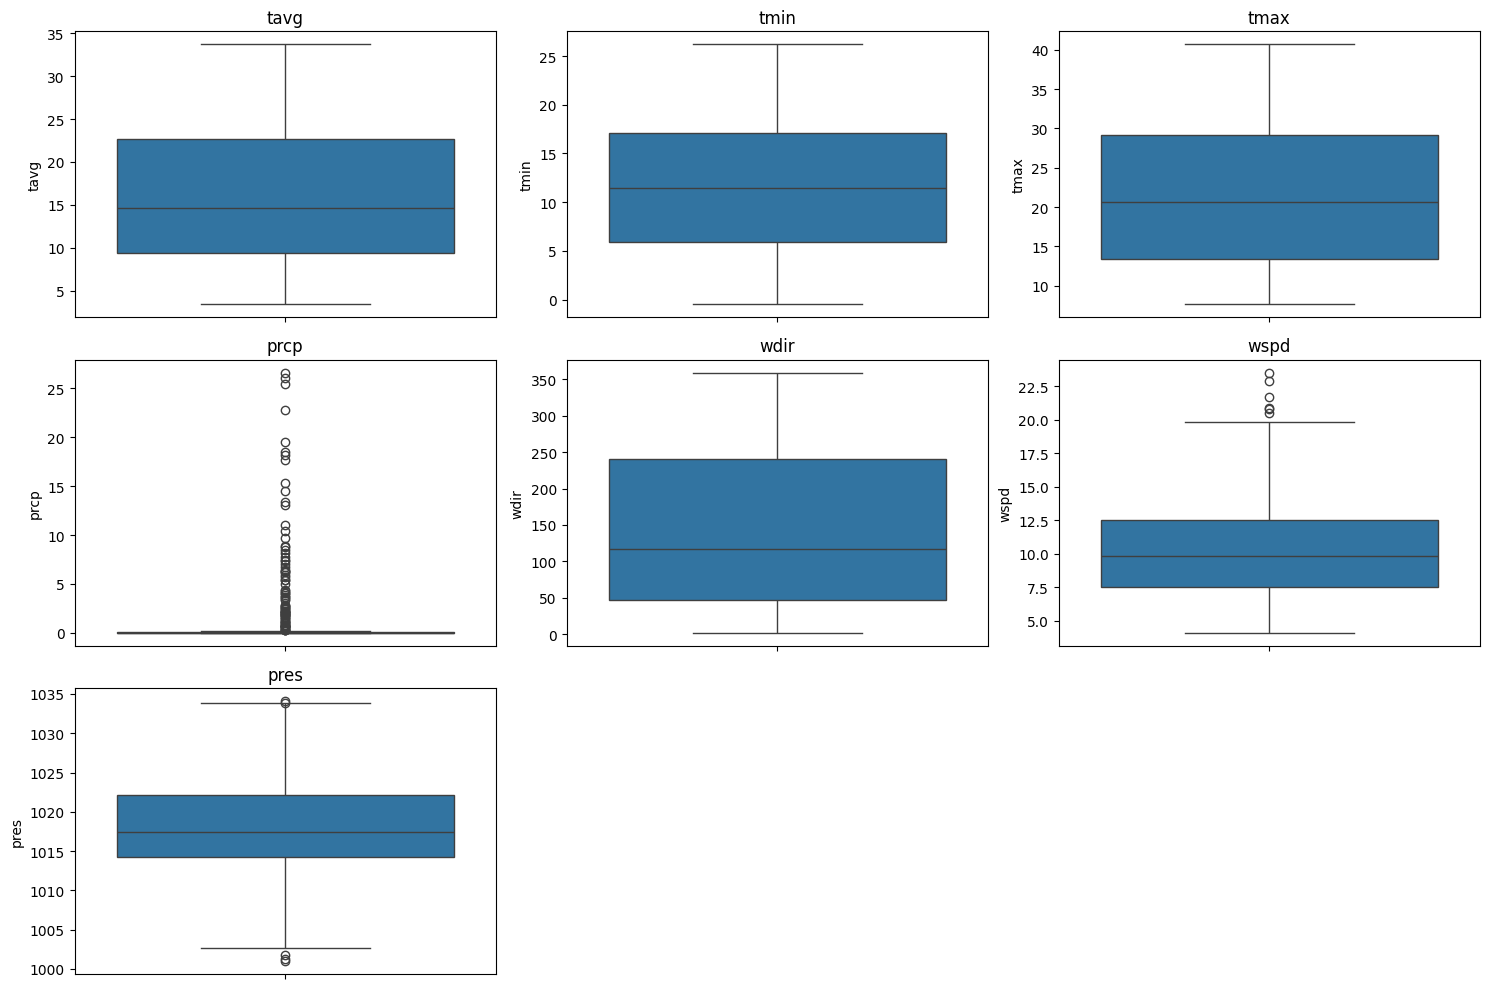

In [ ]:
# Definir las columnas para revisar outliers
columns_to_check = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']

# Crear diagramas de caja para cada una de las columnas seleccionadas
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


**NORMALIZACIÓN DE LOS DATOS**

-->Estandarización: Útil si tus datos siguen una distribución normal o si necesitas preservar los valores negativos en tus datos. Es comúnmente usada en algoritmos que asumen que los datos están centrados en torno a 0, como SVM o PCA.

-->Normalización: Más apropiada si tus datos no siguen una distribución normal o si estás trabajando con algoritmos que son sensibles a la magnitud de los valores, como KNN o redes neuronales.

**Z-score normalization**

Dado que los datos meteorológicos pueden incluir eventos extremos (lluvia muy fuerte o viento muy fuerte), es importante elegir un método que sea sensible a los valores atípicos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador StandardScaler para la estandarización
standard_scaler = StandardScaler()

# Aplicar la estandarización a las columnas seleccionadas
new_data_standardized = df.copy()
new_data_standardized[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Mostrar las primeras filas del conjunto de datos estandarizado
new_data_standardized.head()


,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2022-01-01,-0.794859,-0.940391,-0.580302,-0.341636,-1.192860,-1.129823,1.649661
1,2022-01-02,-0.869364,-0.998526,-0.817649,-0.341636,-1.079300,-1.526017,1.824689
2,2022-01-03,-0.919034,-0.925857,-0.893168,-0.341636,0.832294,-1.261888,1.347341
3,2022-01-04,-1.130132,-0.983992,-1.076572,1.536024,0.803904,1.009626,-0.291553
4,2022-01-05,-1.316395,-1.114795,-1.421804,0.944433,1.352778,0.956800,0.201707


In [ ]:
#Estadísticas por pantalla
df.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.501096,11.970411,22.078904,1.328219,147.050685,10.377534,1018.232329
std,8.064179,6.889999,9.281869,3.893154,105.816012,3.791219,6.293354
min,3.400000,-0.500000,7.600000,0.000000,2.000000,4.100000,1001.000000
25%,9.400000,5.900000,13.400000,0.000000,47.000000,7.500000,1014.300000
50%,14.600000,11.500000,20.700000,0.000000,117.000000,9.800000,1017.400000
75%,22.700000,17.100000,29.200000,0.100000,241.000000,12.500000,1022.100000
max,33.700000,26.200000,40.700000,26.600000,359.000000,23.500000,1034.100000


In [ ]:
df.dtypes

date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
wdir    float64
wspd    float64
pres    float64
dtype: object

**ANÁLISIS DE CORRELACIÓN**

para ver si hay variables redundantes

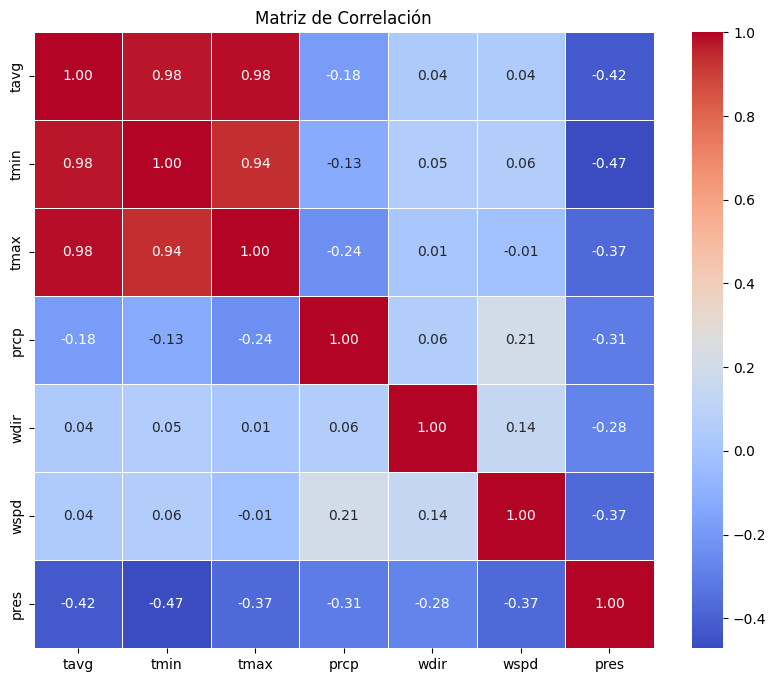

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = new_data_standardized[numerical_columns].corr()

# Visualizar la matriz de correlación mediante un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()
